# 1. EDA - Análise de Crédito
Para otimizar a concessão de crédito, instituições financeiras podem realizar análises que constatem condições e hábitos financeiros de seus clientes. O dataset escolhido traz informações sobre o crédito de clientes de uma instituição financeira no ano de 2022.
Aqui procuraremos responder às seguintes perguntas relacionadas aos clientes desta instituição:
1. Qual a faixa etária majoritária?
2. Qual sua distribuição de renda?
3. Qual a média de seus débitos mensais?
4. Entre aqueles que pagaram o valor mínimo da fatura, como essa condição afeta suas taxas de juros?
5. Existe associação entre a quantidade de emprestimos tomados com a quantidade de contas bancárias?

## 1.1.Dataset "Credit Score Classification"

O dataset intitulado "Credit score classification" traz informações sobre crédito de diversos clientes de uma instituição financeira no ano de 2022. Coletado na plataforma Kaggle, apesar de seu intuito ser a utilização em modelos de previsão, aqui usaremos para fins de análise exploratória. Em sua página, encontramos informações básicas sobre a discrição das colunas. Todas a informações adicionais foram retiradas a partir da etapa de tratamento dos dados.

Link: https://www.kaggle.com/datasets/parisrohan/credit-score-classification

À princípio, temos as seguintes informações sobre cada coluna:
1. ID
2. Customer_ID
3. Name
4. Month
5. Month
6. Age
7. Occupation
8. Annual_Income
9. Monthly_Inhand_Salary
10. Num_Bank_Accounts
11. Num_Credit_Card
12. Interest_Rate
13. Num_of_Loan
14. Type_of_Loan
15. Delay_from_due_date
16. Num_of_Delayed_Payment
17. Changed_Credit_Limit
18. Num_Credit_Inquiries
19. Credit_Mix
20. Outstanding_Debt
21. Credit_Utilization_Ratio
22. Credit_History_Age
23. Payment_of_Min_Amount
24. Total_EMI_per_month
25. Amount_invested_monthly
26. Payment_Behaviour
27. Monthly_Balance

Algumas delas serão usadas somente na etapa de tratamento para completar valores faltantes. Ao final desta etapa, manteremos somente 13 colunas. 

In [412]:
import pandas as pd
import numpy as np
from plotnine import *
%matplotlib inline 

In [413]:
dados = pd.read_csv('test.csv')
dados.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


In [414]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        50000 non-null  object 
 1   Customer_ID               50000 non-null  object 
 2   Month                     50000 non-null  object 
 3   Name                      44985 non-null  object 
 4   Age                       50000 non-null  object 
 5   SSN                       50000 non-null  object 
 6   Occupation                50000 non-null  object 
 7   Annual_Income             50000 non-null  object 
 8   Monthly_Inhand_Salary     42502 non-null  float64
 9   Num_Bank_Accounts         50000 non-null  int64  
 10  Num_Credit_Card           50000 non-null  int64  
 11  Interest_Rate             50000 non-null  int64  
 12  Num_of_Loan               50000 non-null  object 
 13  Type_of_Loan              44296 non-null  object 
 14  Delay_

In [415]:
dados.isnull().sum().sum()

30053

# 2. TRATAMENTO

## 2.1. Identificador

"Customer_ID" e "ID"

In [416]:
dados.head(10)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,CUS_0x21b1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,CUS_0x21b1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,CUS_0x21b1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,CUS_0x2dbc,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,CUS_0x2dbc,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


Aqui é possível constatar que "ID" trata-se de um identificador de uma única ocorrência(atualização) por cliente. Já "Customer_ID" refere-se ao código do cliente, uma vez que o mesmo cliente pode ter diversas atualizações no banco da dados.

Já nas primeiras linhas, conseguimos visualizar que um mesmo "Customer_ID" possui valores faltantes que podem ser encontrados em outras linhas referentes ao mesmo cliente. Neste caso, é apropriado preencher esses valores através de um agrupamento pelo "Customer_ID"

In [417]:
dados['Customer_ID'] = dados['Customer_ID'].factorize()[0]

In [418]:
agrp_customer = dados.groupby('Customer_ID')

In [419]:
dados = agrp_customer[['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']].apply(lambda x: x.fillna(method='ffill'))

/tmp/ipykernel_10758/2770618726.py:8: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


In [420]:
dados.isnull().sum().sum()

12488

Como usamos o método de preenchimento "ffill" para a função "fillna", alguns valores podem não terem sido preenchidos, caso estes estivessem na primeira linha de identificação.

In [421]:
dados.head(12)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,0,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,0,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,0,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,22 Years and 10 Months,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,0,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923
5,0x1617,1,October,Rick Rothackerj,28,#F%$D@*&8,Teacher,34847.84,3037.986667,2,...,5.0,Good,605.03,30.116600,27 Years and 4 Months,No,18.816215,251.62736875017606,Low_spent_Large_value_payments,303.3550833433617
6,0x1618,1,November,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,30.996424,27 Years and 5 Months,No,18.816215,72.68014533363515,High_spent_Large_value_payments,452.30230675990265
7,0x1619,1,December,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,5.0,_,605.03,33.875167,27 Years and 6 Months,No,18.816215,153.53448761392985,!@9#%8,421.44796447960783
8,0x1622,2,September,Langep,35,486-85-3974,Engineer,143162.64,NaN,1,...,3.0,Good,1303.01,35.229707,18 Years and 5 Months,No,246.992319,397.50365354404653,Low_spent_Medium_value_payments,854.2260270022115
9,0x1623,2,October,Langep,35,486-85-3974,Engineer,143162.64,12187.220000,1,...,3.0,Good,1303.01,35.685836,18 Years and 6 Months,No,246.992319,453.6151305781054,Low_spent_Large_value_payments,788.1145499681528


Porém, como não manteremos registros repetidos do mesmo cliente e já conseguimos completar boa parte dos dados faltantes, iremos partir para a ordenação cronológica. Para que os resultados da análise não sejam afetados pelo acumulo de valores de clientes repetidos, iremos ordená-los pela coluna "Month" e manter somente o registro mais atual de cada um.

In [422]:
dados['Month'].unique()

array(['September', 'October', 'November', 'December'], dtype=object)

In [423]:
mes = {'September':'01/09/2022','October':'01/10/2022','November':'01/11/2022','December':'01/12/2022'}

In [424]:
dados['Month'] = dados['Month'].map(mes)

In [425]:
dados['Month'] = pd.to_datetime(dados['Month'])

In [426]:
dados.sort_values(by='Month', inplace = True)

In [427]:
dados.drop_duplicates(subset=['Customer_ID'],keep='last',inplace=True)
dados.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
45707,0x22da5,11426,2022-01-12,Svea Herbst-Baylissx,28,947-47-2443,Engineer,14219.345,1418.945417,5,...,6.0,Standard,172.94,27.435240,19 Years and 3 Months,No,30.050423,81.07985061621973,High_spent_Small_value_payments,290.7642680393258
44655,0x22151,11163,2022-01-12,Toyerp,33,#F%$D@*&8,Developer,144469.36_,11835.113333,1,...,5.0,_,361.73,37.950494,33 Years and 4 Months,NM,95.048608,151.81671115086698,High_spent_Large_value_payments,1176.6460144396424
43283,0x2113d,10820,2022-01-12,Caroline Valetkevitchs,45,248-22-7032,_______,28435.76,2266.646667,3,...,10.0,Standard,1962.25,38.394218,8 Years and 6 Months,Yes,116.720193,125.15826279807054,Low_spent_Small_value_payments,274.7862105484057
40907,0x1f565,10226,2022-01-12,Daria Sito-Sucicd,33,563-29-1145,Mechanic,29818.78,2257.898333,4,...,6.0,Good,702.2,30.213849,32 Years and 2 Months,No,45.977299,55.228733696331,High_spent_Small_value_payments,384.5838009497572
43279,0x21131,10819,2022-01-12,Herberts,28,438-91-3759,Musician,16702.25,1640.854167,10,...,13.0,Bad,4536.64,24.763899,7 Years and 8 Months,NM,57.470933,50.77633652145761,High_spent_Medium_value_payments,305.83814703384184


Checando as alterações com "Customer_ID" do primeiro cliente do df original:

In [428]:
dados.loc[dados['Customer_ID'] == 0]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
3,0x160d,0,2022-01-12,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634


Agora, excluiremos as colunas "ID", "Name" e "SSN" pois já temos um único identificador por cliente

In [429]:
dados.drop(columns=['ID','Name','SSN'], inplace=True)
dados.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
45707,11426,2022-01-12,28,Engineer,14219.345,1418.945417,5,7,10,4,...,6.0,Standard,172.94,27.435240,19 Years and 3 Months,No,30.050423,81.07985061621973,High_spent_Small_value_payments,290.7642680393258
44655,11163,2022-01-12,33,Developer,144469.36_,11835.113333,1,5,5,1,...,5.0,_,361.73,37.950494,33 Years and 4 Months,NM,95.048608,151.81671115086698,High_spent_Large_value_payments,1176.6460144396424
43283,10820,2022-01-12,45,_______,28435.76,2266.646667,3,10,15,7,...,10.0,Standard,1962.25,38.394218,8 Years and 6 Months,Yes,116.720193,125.15826279807054,Low_spent_Small_value_payments,274.7862105484057
40907,10226,2022-01-12,33,Mechanic,29818.78,2257.898333,4,4,7,2,...,6.0,Good,702.2,30.213849,32 Years and 2 Months,No,45.977299,55.228733696331,High_spent_Small_value_payments,384.5838009497572
43279,10819,2022-01-12,28,Musician,16702.25,1640.854167,10,8,23,5,...,13.0,Bad,4536.64,24.763899,7 Years and 8 Months,NM,57.470933,50.77633652145761,High_spent_Medium_value_payments,305.83814703384184


## 2.2. Renda

"Monthly_Inhand_Salary" e "Annual_Income"

Acima é possível reparar que na coluna "Annual_Income" existem caracteres não numéricos que impedem o reconhecimento da coluna como float. Iremos subtituí-los antes de fazer a conversão:

In [430]:
dados['Annual_Income'] = dados['Annual_Income'].str.replace('_','')
dados['Annual_Income'] = dados['Annual_Income'].astype(float)

In [431]:
dados['Annual_Income'].info()

<class 'pandas.core.series.Series'>
Int64Index: 12500 entries, 45707 to 49999
Series name: Annual_Income
Non-Null Count  Dtype  
--------------  -----  
12500 non-null  float64
dtypes: float64(1)
memory usage: 195.3 KB


In [432]:
dados['Monthly_Inhand_Salary'].info()

<class 'pandas.core.series.Series'>
Int64Index: 12500 entries, 45707 to 49999
Series name: Monthly_Inhand_Salary
Non-Null Count  Dtype  
--------------  -----  
12493 non-null  float64
dtypes: float64(1)
memory usage: 195.3 KB


Agora, é possível verificar que não há valores faltantes em "Anual_Income" (Rendimento anual), mas há alguns em "Monthly_Inhand_Salary" (Salário líquido mensal). Sendo assim, para os valores faltantes do salário mensal, utilizaremos o rendimento anual do cliente dividido por 12. 

In [433]:
dados.loc[dados['Monthly_Inhand_Salary'].isnull()]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
40247,10061,2022-01-12,37,Accountant,96027.160,NaN,7,3,15,0,...,3.0,Standard,726.75,42.983701,17 Years and 6 Months,Yes,0.000000,126.68343104761392,High_spent_Large_value_payments,885.6429022857194
40067,10016,2022-01-12,41,Manager,106789.360,NaN,3,1328,20,3,...,2.0,Standard,155.69,23.951132,19 Years and 8 Months,No,137.828348,759.0739374344851,Low_spent_Small_value_payments,260.4090475881417
45303,11325,2022-01-12,44,Musician,14656.405,NaN,5,5,15,5,...,12.0,Standard,1328.53,30.247689,8 Years and 4 Months,Yes,39.195257,55.473199629412754,Low_spent_Large_value_payments,277.7682521427448
17587,4396,2022-01-12,18,Teacher,19742.240,NaN,7,6,32,4,...,14.0,Standard,1373.49,22.053660,9 Years and 6 Months,Yes,52.090958,68.80395892083403,Low_spent_Small_value_payments,331.0237492657568
18939,4734,2022-01-12,31,Musician,8721.605,NaN,6,7,20,2,...,7.0,Standard,2592.45,32.713766,11 Years and 8 Months,Yes,12.867951,82.08209504121835,Low_spent_Small_value_payments,287.8299951354764
15331,3832,2022-01-12,3577,Doctor,59072.520,NaN,8,9,28,6,...,13.0,_,2781.03,29.732857,11 Years and 0 Months,Yes,219.506998,125.31630898104702,Low_spent_Medium_value_payments,417.6476928039231
32271,8067,2022-01-12,34,Engineer,29902.220,NaN,6,3,12,3,...,3.0,Standard,533.71,30.589973,20 Years and 7 Months,Yes,66.210327,148.89670910164068,Low_spent_Large_value_payments,277.9781304693087


In [434]:
dados['Monthly_Inhand_Salary'].fillna(value= dados['Annual_Income']/12, inplace=True)

In [435]:
dados.loc[(dados['Customer_ID'] == 10061) | (dados['Customer_ID'] == 10016)| (dados['Customer_ID'] ==  8067)| 
                                            (dados['Customer_ID'] == 11325)| (dados['Customer_ID'] ==  4396)| 
                                            (dados['Customer_ID'] ==  4734)| (dados['Customer_ID'] ==  3832)]

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
40247,10061,2022-01-12,37,Accountant,96027.160,8002.263333,7,3,15,0,...,3.0,Standard,726.75,42.983701,17 Years and 6 Months,Yes,0.000000,126.68343104761392,High_spent_Large_value_payments,885.6429022857194
40067,10016,2022-01-12,41,Manager,106789.360,8899.113333,3,1328,20,3,...,2.0,Standard,155.69,23.951132,19 Years and 8 Months,No,137.828348,759.0739374344851,Low_spent_Small_value_payments,260.4090475881417
45303,11325,2022-01-12,44,Musician,14656.405,1221.367083,5,5,15,5,...,12.0,Standard,1328.53,30.247689,8 Years and 4 Months,Yes,39.195257,55.473199629412754,Low_spent_Large_value_payments,277.7682521427448
17587,4396,2022-01-12,18,Teacher,19742.240,1645.186667,7,6,32,4,...,14.0,Standard,1373.49,22.053660,9 Years and 6 Months,Yes,52.090958,68.80395892083403,Low_spent_Small_value_payments,331.0237492657568
18939,4734,2022-01-12,31,Musician,8721.605,726.800417,6,7,20,2,...,7.0,Standard,2592.45,32.713766,11 Years and 8 Months,Yes,12.867951,82.08209504121835,Low_spent_Small_value_payments,287.8299951354764
15331,3832,2022-01-12,3577,Doctor,59072.520,4922.710000,8,9,28,6,...,13.0,_,2781.03,29.732857,11 Years and 0 Months,Yes,219.506998,125.31630898104702,Low_spent_Medium_value_payments,417.6476928039231
32271,8067,2022-01-12,34,Engineer,29902.220,2491.851667,6,3,12,3,...,3.0,Standard,533.71,30.589973,20 Years and 7 Months,Yes,66.210327,148.89670910164068,Low_spent_Large_value_payments,277.9781304693087


Usaremos intervalo de salários para facilitar na plotagem.

In [436]:
bins = [0,3000,6000,9000,12000,16000]
dados['Monthly_Inhand_Salary'] = pd.cut(dados['Monthly_Inhand_Salary'],bins=bins)

## 2.3. Tipos e Números de empréstimos tomados 

"Type_of_Loan" e "Num_of_Loan"

In [437]:
dados['Type_of_Loan'].isnull().sum()

1426

In [438]:
dados2 = dados.copy()
colunas = pd.DataFrame(dados2[['Num_of_Loan','Type_of_Loan']])
colunas.sample(frac=0.002,random_state=54)

,Num_of_Loan,Type_of_Loan
8611,1,Not Specified
17727,1,Mortgage Loan
3871,-100,Not Specified
2275,0,NaN
2055,6,"Credit-Builder Loan, Payday Loan, Payday Loan,..."
559,4,"Student Loan, Home Equity Loan, Not Specified,..."
5187,0,NaN
18387,4,"Mortgage Loan, Credit-Builder Loan, Auto Loan,..."
48099,-100,"Mortgage Loan, and Home Equity Loan"
20827,4,"Not Specified, Payday Loan, Home Equity Loan, ..."


Analisando a coluna Tipo de Empréstimo Tomado por um Cliente ("Type_of_Loan") ao lado da coluna Número de Emprétimos Tomados por um Cliente ("Num_of_Loan"), conseguimos verificar que, em regra, uma quantifica e a outra, categoriza. Sendo assim, podemos fatiar os itens de "Type_of_Loan" separados por vírgulas e passar sua dimensão para a coluna "Num_of_Loan".

Fazendo a comparação de valores com o df "colunas"

In [439]:
colunas['Num_of_Loan2'] = colunas['Type_of_Loan'].str.split(',')
colunas['Num_of_Loan2'] = colunas['Num_of_Loan2'].str.len()
colunas.sample(frac=0.001,random_state=54)

,Num_of_Loan,Type_of_Loan,Num_of_Loan2
8611,1,Not Specified,1.0
17727,1,Mortgage Loan,1.0
3871,-100,Not Specified,1.0
2275,0,NaN,NaN
2055,6,"Credit-Builder Loan, Payday Loan, Payday Loan,...",6.0
559,4,"Student Loan, Home Equity Loan, Not Specified,...",4.0
5187,0,NaN,NaN
18387,4,"Mortgage Loan, Credit-Builder Loan, Auto Loan,...",4.0
48099,-100,"Mortgage Loan, and Home Equity Loan",2.0
20827,4,"Not Specified, Payday Loan, Home Equity Loan, ...",4.0


Aplicando ao df dados:

In [440]:
dados['Num_of_Loan'] = dados['Type_of_Loan'].str.split(',')
dados['Num_of_Loan'] = dados['Num_of_Loan'].str.len()

Para os valores faltantes em "Type_of_Loan" vamos preencher com "No Loan" e para os valores faltantes em "Num_of_Loan" vamos preencher com 0(zero). Depois, basta converter tudo pra inteiro.

In [441]:
dados['Type_of_Loan'].fillna(value= 'No Loan', inplace=True)
dados['Num_of_Loan'].fillna(value= 0, inplace=True)
dados['Num_of_Loan'] = dados['Num_of_Loan'].astype(int)
pd.DataFrame(dados[['Num_of_Loan','Type_of_Loan']]).sample(frac=0.001,random_state=54)

,Num_of_Loan,Type_of_Loan
8611,1,Not Specified
17727,1,Mortgage Loan
3871,1,Not Specified
2275,0,No Loan
2055,6,"Credit-Builder Loan, Payday Loan, Payday Loan,..."
559,4,"Student Loan, Home Equity Loan, Not Specified,..."
5187,0,No Loan
18387,4,"Mortgage Loan, Credit-Builder Loan, Auto Loan,..."
48099,2,"Mortgage Loan, and Home Equity Loan"
20827,4,"Not Specified, Payday Loan, Home Equity Loan, ..."


## 2.4. Número de contas bancárias

"Num_Banks_Accounts"

In [442]:
dados['Num_Bank_Accounts'].value_counts()

6       1626
7       1606
8       1594
5       1518
4       1518
        ... 
566        1
1068       1
1262       1
552        1
1711       1
Name: Num_Bank_Accounts, Length: 171, dtype: int64

In [443]:
dados['Num_Bank_Accounts'].quantile([0.95])

0.95    10.0
Name: Num_Bank_Accounts, dtype: float64

Como a maioria dos clientes possuem até 10 contas bancárias, iremos exluir os valores discrepantes do intervalor [0:10] e susbtituí-los pela mediana da coluna.

In [444]:
dados['Num_Bank_Accounts'] = dados['Num_Bank_Accounts'].astype(int)
dados['Num_Bank_Accounts'] =np.where((dados['Num_Bank_Accounts'] < 0) | (dados['Num_Bank_Accounts'] > 10), 
                            np.nan, dados['Num_Bank_Accounts'])

dados['Num_Bank_Accounts'].isnull().sum()

172

In [445]:
mediana_c_bancaria =  dados['Num_Bank_Accounts'].median()
dados['Num_Bank_Accounts'].fillna(mediana_c_bancaria, inplace=True)
dados['Num_Bank_Accounts'] = dados['Num_Bank_Accounts'].astype(int)
dados['Num_Bank_Accounts'].isnull().sum()

0

## 2.5. Idade

Idade está sendo tratada como objeto. Possivelmente, temos nesta coluna elementos não numéricos:

In [446]:
dados['Age'].info()

<class 'pandas.core.series.Series'>
Int64Index: 12500 entries, 45707 to 49999
Series name: Age
Non-Null Count  Dtype 
--------------  ----- 
12500 non-null  object
dtypes: object(1)
memory usage: 195.3+ KB


In [447]:
dados['Age'] = dados['Age'].str.replace('_','')
dados['Age'] = dados['Age'].astype(int)

In [448]:
dados['Age'].max()

8641

In [449]:
dados['Age'].min()

-500

Como existem muitos valores discrepantes do intervalo [18:90], primeiramente, iremos exluir esses valores.

In [450]:
dados['Age'] = dados['Age'].astype(int)

dados['Age'] = np.where((dados['Age'] < 18) | (dados['Age'] > 90), 
                            np.nan, dados['Age'])

dados['Age'].isnull().sum()

937

Aqui, não iremos aplicar nenhum método para o preenchimento das idades faltantes, por isso, iremos dropar essas linhas

In [451]:
dados.dropna(subset='Age',inplace=True)
dados['Age'].isnull().sum()

0

In [452]:
dados['Age'] = np.trunc(dados['Age']).astype(int)

## 2.6. Número de cartões de crédito

"Num_Credit_Card"

In [453]:
dados['Num_Credit_Card'].value_counts()

5       2128
6       1908
7       1897
4       1665
3       1543
        ... 
477        1
1201       1
1359       1
1474       1
879        1
Name: Num_Credit_Card, Length: 251, dtype: int64

In [454]:
dados['Num_Credit_Card'].quantile(0.95)

10.0

A maioria dos clientes possuem até 10 cartões de crédito, por isso iremos excluir os valores discrepantes fora do intervalo [0:10]. 

In [455]:
dados['Num_Credit_Card'] = dados['Num_Credit_Card'].astype(int)

dados['Num_Credit_Card'] = np.where((dados['Num_Credit_Card'] < 0) | (dados['Num_Credit_Card'] > 10), 
                            np.nan, dados['Num_Credit_Card'])

dados['Num_Credit_Card'].isnull().sum()

278

In [456]:
dados.loc[dados['Num_Credit_Card'].isnull()].head() #consultaremos posteriormente o Customer_ID 11571 para checar as alterações

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
46287,11571,2022-01-12,24,Engineer,7160.835,"(0, 3000]",10,NaN,16,5,...,11.0,Standard,1285.23,28.003264,20 Years and 5 Months,Yes,25.072510,29.509423146264552,Low_spent_Small_value_payments,278.5916918480729
43303,10825,2022-01-12,39,Architect,35846.520,"(3000, 6000]",4,NaN,19,3,...,9.0,Standard,332.22,37.878765,20 Years and 7 Months,Yes,84.346034,108.77491688034044,High_spent_Medium_value_payments,358.30004948222216
41459,10364,2022-01-12,45,Journalist,61990.520,"(3000, 6000]",10,NaN,25,9,...,9.0,_,3618.91,24.137962,14 Years and 1 Months,Yes,355.143396,153.86373709968262,High_spent_Medium_value_payments,231.08053369563012
46311,11577,2022-01-12,28,Journalist,30884.060,"(0, 3000]",5,NaN,30,7,...,11.0,Standard,2336.66,34.928488,20 Years and 1 Months,Yes,150.690564,89.63690189162995,High_spent_Medium_value_payments,239.8397004352977
41703,10425,2022-01-12,44,Musician,89122.800,"(6000, 9000]",7,NaN,12,1,...,1.0,Standard,331.53,31.009677,26 Years and 8 Months,No,21501.000000,311.5454247007934,Low_spent_Medium_value_payments,624.8851998861032


Como abaixo podemos notar uma certa associação entre Num_Credit_Cards e Credit_Mix, a ideia é preencher os valores faltantes através do mapeamento do Mix de Crédito. Faremos um agrupamento de clientes pelas classes do Mix de Crédito (Good, Standard or Bad) e, para os valores faltantes, preencheremos com a média de cartões de crédito de sua respectiva classe de Mix de Crédito.

In [457]:
agrupar_por_credit_mix = dados.groupby('Credit_Mix').mean()
agrupar_por_credit_mix.head()

/tmp/ipykernel_10758/932596065.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Customer_ID,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
Credit_Mix,,,,,,,,,,,
Bad,6209.482330,31.867717,162949.370107,7.907354,7.450442,72.989016,6.340974,38.265998,36.988539,31.607134,1707.755791
Good,6241.416806,37.550850,183185.541727,2.919973,4.329922,64.635879,1.988663,10.035012,29.050684,32.871267,1410.869879
Standard,6325.447850,34.607983,193507.079012,5.649560,5.309246,77.063198,3.044666,19.257068,28.122594,32.271763,1649.690046
_,6190.820433,34.731535,181075.377353,5.290137,5.496374,55.645290,3.463954,20.703671,34.720035,32.284241,1428.854844


In [458]:
media_credit_cards = agrupar_por_credit_mix['Num_Credit_Card'] #recebe somente a coluna Num_Credit_Cards no agrupamento

df_media = pd.DataFrame({'Credit_Mix': media_credit_cards.index, 'Num_Credit_Card_Media': media_credit_cards.values}) 
#transforma em df, passando para o dicionário duas colunas: 'Credit_Mix', com os valores da série 'Credit_Mix', associando ao índice; 
#e 'Num_Credit_Card_Media', com os valores da série media_credit_cards.

media_dict = df_media.set_index('Credit_Mix')['Num_Credit_Card_Media'].to_dict()
#tranformando o df_media em um dicionário, onde a chaves serão os elementos de 'Credit_Mix' e os valores serão os elementos de 'Num_Credit_Card_Media'

dados['Num_Credit_Card'].fillna(dados['Credit_Mix'].map(media_dict), inplace=True)
#Aqui iremos preencher os valores vazios da coluna 'Num_Credit_Card' do df dados com o mapeamento do dicionário media_dict, aplicando a transformação no
#df original

In [459]:
dados.loc[dados['Customer_ID'] == 11571] #checando as alterações com o Customer_ID 11571

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
46287,11571,2022-01-12,24,Engineer,7160.835,"(0, 3000]",10,5.309246,16,5,...,11.0,Standard,1285.23,28.003264,20 Years and 5 Months,Yes,25.07251,29.509423146264552,Low_spent_Small_value_payments,278.5916918480729


In [460]:
dados['Num_Credit_Card'].isnull().sum()

0

Agora é só truncar os valores da coluna e transformar no tipo inteiro.

In [461]:
dados['Num_Credit_Card'] = np.trunc(dados['Num_Credit_Card'])
dados['Num_Credit_Card'] = dados['Num_Credit_Card'].astype(int)

## 2.7 - Taxa de juros

"Interest_Rate"

In [462]:
dados['Interest_Rate'].value_counts()

5       597
8       587
6       559
12      552
7       541
       ... 
5074      1
5379      1
3210      1
5551      1
4295      1
Name: Interest_Rate, Length: 244, dtype: int64

In [463]:
dados['Interest_Rate'].quantile(0.9)

29.0

In [464]:
dados['Interest_Rate'] = dados['Interest_Rate'].astype(int)

dados['Interest_Rate'] = np.where((dados['Interest_Rate'] < 0) | (dados['Interest_Rate'] > 30), 
                            np.nan, dados['Interest_Rate'])

dados['Interest_Rate'].isnull().sum()

891

Faremos o mesmo processo de associação com o Credit Mix

In [465]:
dados.loc[dados['Interest_Rate'].isnull()].head() #consultaremos posteriormente o Customer_ID 10830 para checar as alterações

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
43323,10830,2022-01-12,22,Entrepreneur,37360.94,"(0, 3000]",10,5,NaN,5,...,15.0,Standard,1271.23,24.755873,12 Years and 2 Months,NM,93.341747,66.0923902782764,!@9#%8,377.00702982122976
40195,10048,2022-01-12,33,Doctor,19124.40,"(0, 3000]",5,8,NaN,1,...,7.0,Standard,1110.63,25.386024,32 Years and 6 Months,No,15.522587,89.3045516277187,Low_spent_Small_value_payments,371.142861095998
49467,12366,2022-01-12,50,Journalist,175718.64,"(12000, 16000]",3,5,NaN,0,...,5.0,Good,1336.86,39.092359,23 Years and 9 Months,No,0.000000,530.1266829505305,High_spent_Medium_value_payments,1190.5953170494695
45735,11433,2022-01-12,42,_______,86097.54,"(6000, 9000]",5,2,NaN,2,...,2.0,Good,10.29,42.293856,19 Years and 10 Months,No,128.404075,159.95764807916706,High_spent_Large_value_payments,671.9177766955368
44651,11162,2022-01-12,29,Musician,8826.66,"(0, 3000]",10,10,NaN,9,...,11.0,_,3851.63,41.288280,9 Years and 3 Months,Yes,46.288522,20.294112866548193,!@9#%8,274.2728650258045


In [466]:
agrupar_por_credit_mix2 = dados.groupby('Credit_Mix').mean()
agrupar_por_credit_mix2.head()

/tmp/ipykernel_10758/2777154611.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,Customer_ID,Age,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
Credit_Mix,,,,,,,,,,,
Bad,6209.482330,31.867717,162949.370107,7.907354,7.438395,22.541592,6.340974,38.265998,36.988539,31.607134,1707.755791
Good,6241.416806,37.550850,183185.541727,2.919973,4.322441,6.429009,1.988663,10.035012,29.050684,32.871267,1410.869879
Standard,6325.447850,34.607983,193507.079012,5.649560,5.301972,13.971299,3.044666,19.257068,28.122594,32.271763,1649.690046
_,6190.820433,34.731535,181075.377353,5.290137,5.484299,13.253824,3.463954,20.703671,34.720035,32.284241,1428.854844


In [467]:
media_interest_rate = agrupar_por_credit_mix2['Interest_Rate'] 

df_media_interest_rate = pd.DataFrame({'Credit_Mix': media_interest_rate.index, 'Interest_Rate_Media': media_interest_rate.values}) 

media_dict2 = df_media_interest_rate.set_index('Credit_Mix')['Interest_Rate_Media'].to_dict()

dados['Interest_Rate'].fillna(dados['Credit_Mix'].map(media_dict2), inplace=True)

dados['Interest_Rate'] = np.trunc(dados['Interest_Rate'])

dados['Interest_Rate'] = dados['Interest_Rate'].astype(int)

In [468]:
dados.loc[dados['Customer_ID'] == 10048] #checando as alterações com o Customer_ID 10048

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
40195,10048,2022-01-12,33,Doctor,19124.4,"(0, 3000]",5,8,13,1,...,7.0,Standard,1110.63,25.386024,32 Years and 6 Months,No,15.522587,89.3045516277187,Low_spent_Small_value_payments,371.142861095998


## 2.8 - Dias de atraso do pagamento da fatura

"Delay_from_due_date"

In [469]:
dados['Delay_from_due_date'].value_counts()

 15    419
 13    416
 6     401
 12    397
 11    397
      ... 
 64      9
 65      6
 66      5
-5       4
 63      3
Name: Delay_from_due_date, Length: 72, dtype: int64

In [470]:
dados['Delay_from_due_date'].quantile(0.98)

59.0

Faremos o mesmo processo de associação pelo Credit Mix

In [471]:
dados['Delay_from_due_date'] = dados['Delay_from_due_date'].astype(int)

dados['Delay_from_due_date'] = np.where((dados['Delay_from_due_date'] < 0) | (dados['Delay_from_due_date'] > 60), 
                            np.nan, dados['Delay_from_due_date'])

dados['Delay_from_due_date'].isnull().sum()

221

In [472]:
checar_delay_from_due_date = pd.DataFrame(dados[['Customer_ID', 'Delay_from_due_date','Credit_Mix']]) 
checar_delay_from_due_date.loc[checar_delay_from_due_date['Delay_from_due_date'].isnull()] 
#consultaremos posteriormente o 'Customer_ID' 11928

,Customer_ID,Delay_from_due_date,Credit_Mix
47715,11928,NaN,Standard
43311,10827,NaN,Good
41699,10424,NaN,Bad
47383,11845,NaN,Good
47783,11945,NaN,Good
...,...,...,...
27295,6823,NaN,Bad
26483,6620,NaN,_
26535,6633,NaN,_
26783,6695,NaN,Good


In [473]:
agrupar_por_credit_mix3 = dados.groupby('Credit_Mix').mean()

media_delay = agrupar_por_credit_mix3['Delay_from_due_date'] 

df_delay = pd.DataFrame({'Credit_Mix': media_delay.index, 'Delay_from_due_date_Media': media_delay.values}) 

media_dict3 = df_delay.set_index('Credit_Mix')['Delay_from_due_date_Media'].to_dict()

dados['Delay_from_due_date'].fillna(dados['Credit_Mix'].map(media_dict3), inplace=True)

dados['Delay_from_due_date'] = np.trunc(dados['Delay_from_due_date'])

dados['Delay_from_due_date'] = dados['Delay_from_due_date'].astype(int)

/tmp/ipykernel_10758/1888406404.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [474]:
checar_delay_from_due_date2 = pd.DataFrame(dados[['Customer_ID', 'Delay_from_due_date','Credit_Mix']])
checar_delay_from_due_date2.loc[checar_delay_from_due_date2['Customer_ID'] == 11928] 
#Checando com o 'Customer_ID' 11928

,Customer_ID,Delay_from_due_date,Credit_Mix
47715,11928,19,Standard


## 2.9 - Número de pagamentos atrasados

"Num_of_Delayed_Payment"

In [475]:
dados['Num_of_Delayed_Payment'].value_counts

<bound method IndexOpsMixin.value_counts of 45707    16_
44655      0
43283     17
40907      1
43279     18
        ... 
26659     15
26655     11
26651     17
26679     14
49999      5
Name: Num_of_Delayed_Payment, Length: 11563, dtype: object>

In [476]:
dados['Num_of_Delayed_Payment'] = dados['Num_of_Delayed_Payment'].str.replace('_','')
dados['Num_of_Delayed_Payment'] = dados['Num_of_Delayed_Payment'].astype(float)

In [477]:
dados['Num_of_Delayed_Payment'].quantile(0.98)

25.0

Faremos o mesmo processo de associação pelo Credit Mix

In [478]:
dados['Num_of_Delayed_Payment'] = np.where((dados['Num_of_Delayed_Payment'] < 0) | (dados['Num_of_Delayed_Payment'] > 30), 
                            np.nan, dados['Num_of_Delayed_Payment'])

dados['Num_of_Delayed_Payment'].isnull().sum()

162

In [479]:
checar_num_of_delay = dados[['Customer_ID','Num_of_Delayed_Payment','Credit_Mix']]
checar_num_of_delay.loc[checar_num_of_delay['Num_of_Delayed_Payment'].isnull()]
#consultaremos posteriormente o Customer_ID 11438 para checar as alterações

,Customer_ID,Num_of_Delayed_Payment,Credit_Mix
43291,10822,NaN,Good
49475,12368,NaN,Standard
44903,11225,NaN,Standard
43463,10865,NaN,Bad
49243,12310,NaN,_
...,...,...,...
25471,6367,NaN,Standard
25323,6330,NaN,Bad
27099,6774,NaN,_
27111,6777,NaN,Good


In [480]:
agrupar_por_credit_mix4 = dados.groupby('Credit_Mix').mean()

media_num_delay = agrupar_por_credit_mix4['Num_of_Delayed_Payment'] 

df_num_delay = pd.DataFrame({'Credit_Mix': media_num_delay.index, 'Num_of_Delayed_Payment_Media': media_num_delay.values}) 

media_dict4 = df_num_delay.set_index('Credit_Mix')['Num_of_Delayed_Payment_Media'].to_dict()

dados['Num_of_Delayed_Payment'].fillna(dados['Credit_Mix'].map(media_dict4), inplace=True)

dados['Num_of_Delayed_Payment'] = np.trunc(dados['Num_of_Delayed_Payment'])

dados['Num_of_Delayed_Payment'] = dados['Num_of_Delayed_Payment'].astype(int)

/tmp/ipykernel_10758/3443511176.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [481]:
checar_num_of_delay2 = dados[['Customer_ID','Num_of_Delayed_Payment','Credit_Mix']]
checar_num_of_delay2.loc[checar_num_of_delay2['Customer_ID']==11438]
#checando alterações com o 'Customer_ID' 11438

,Customer_ID,Num_of_Delayed_Payment,Credit_Mix


## 2.10 - Valor do débito em USD

"Outstanding_Debt"

In [482]:
dados['Outstanding_Debt'] = dados['Outstanding_Debt'].str.replace('_','').astype(float)

In [483]:
dados['Outstanding_Debt'].quantile(0.98)

4624.6772

In [484]:
dados['Outstanding_Debt'].describe()

count    11563.000000
mean      1392.669572
std       1144.149240
min          0.230000
25%        550.640000
50%       1128.680000
75%       1863.165000
max       4998.070000
Name: Outstanding_Debt, dtype: float64

Aparentemente, como não existe outra variável no dataset que possa limitar o teto para o valor de uma dívida do cliente, iremos manter esta coluna com os valores originais e separá-la por intervalos.

In [485]:
bins = [0,1000,2000,3000,4000,5000]
dados['Outstanding_Debt'] = pd.cut(dados['Outstanding_Debt'],bins=bins)

## 2.11 - Pagamento do mínino da fatura

"Payment_of_Min_Amount"

In [486]:
dados['Payment_of_Min_Amount'].value_counts()

Yes    5788
No     4377
NM     1398
Name: Payment_of_Min_Amount, dtype: int64

Aqui, como desconhecemos o sigificado da classe "NM", iremos dropar essas linhas.

In [487]:
dados = dados[~dados['Payment_of_Min_Amount'].isin(['NM'])]
dados['Payment_of_Min_Amount'].value_counts()

Yes    5788
No     4377
Name: Payment_of_Min_Amount, dtype: int64

In [488]:
dados.columns

Index(['Customer_ID', 'Month', 'Age', 'Occupation', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance'],
      dtype='object')

Por fim, usaremos somente as coluna úteis para esta análise exploratória no momento.

In [489]:
dados = dados[['Customer_ID', 'Month', 'Age',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment','Outstanding_Debt','Payment_of_Min_Amount']]

# 3. ANÁLISE EXPLORATÓRIA

In [490]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10165 entries, 45707 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer_ID             10165 non-null  int64         
 1   Month                   10165 non-null  datetime64[ns]
 2   Age                     10165 non-null  int64         
 3   Monthly_Inhand_Salary   10165 non-null  category      
 4   Num_Bank_Accounts       10165 non-null  int64         
 5   Num_Credit_Card         10165 non-null  int64         
 6   Interest_Rate           10165 non-null  int64         
 7   Num_of_Loan             10165 non-null  int64         
 8   Type_of_Loan            10165 non-null  object        
 9   Delay_from_due_date     10165 non-null  int64         
 10  Num_of_Delayed_Payment  10165 non-null  int64         
 11  Outstanding_Debt        10165 non-null  category      
 12  Payment_of_Min_Amount   10165 non-null  ob

Total de 10.165 clientes em estudo

In [491]:
dados.columns

Index(['Customer_ID', 'Month', 'Age', 'Monthly_Inhand_Salary',
       'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Type_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment',
       'Outstanding_Debt', 'Payment_of_Min_Amount'],
      dtype='object')

## Conhecendo mais sobre o perfil de cliente da instituição

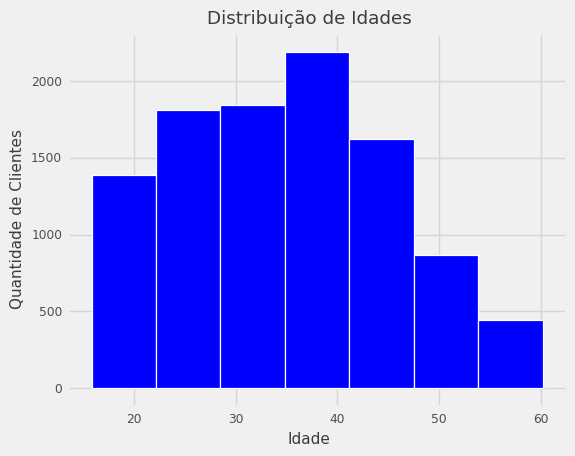

<ggplot: (8749709898734)>

In [492]:
(ggplot(dados, aes(x = 'Age')) +
 geom_histogram(bins =7, color = "white", fill = "blue")+
 labs(x = "Idade",
      y = "Quantidade de Clientes",
      title = "Distribuição de Idades")+
 theme_538())

Aqui é possível verificar que a maioria dos clientes possui até 40 anos, com uma concentração na faixa dos 35-41 anos.

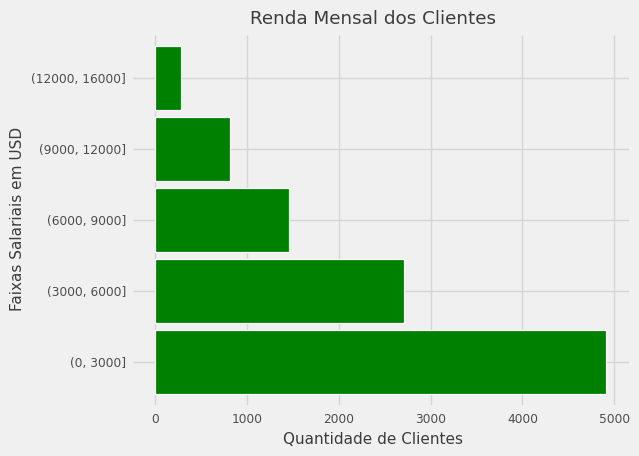

<ggplot: (8749639589078)>

In [493]:
(ggplot(dados, aes(x = 'Monthly_Inhand_Salary')) +
 geom_bar(color = "white", fill = "green") +
 labs(x = "Faixas Salariais em USD",
      y = "Quantidade de Clientes",
      title = "Renda Mensal dos Clientes") +
 theme_538()+
 coord_flip()
 )

Quase 5000 clientes tem renda mensal de até 3.000,00 dólares, ou seja, aproximadamente metade dos clientes dessa instituição. A maior faixa salarial, de 12 à 16 mil dólares, não alcança nem 1000 clientes. A quantidade de clientes decai conforme o aumento das faixas salariais. 

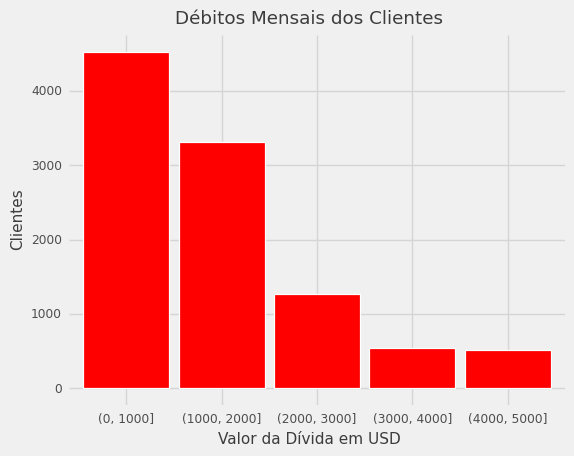

<ggplot: (8749613812706)>

In [494]:
## Gráfico de Barras
(ggplot(dados, aes(x = 'Outstanding_Debt')) +
 geom_bar(color = 'white',fill = "red") +
 labs(x = "Valor da Dívida em USD",
      y = "Clientes",
      title = "Débitos Mensais dos Clientes") +
 theme_538()
 )

A maior parte dos cliente possuem dívidas de até 2.000,00 dólares, por mês. Tendo em vista a distribuição de salários, muitos clientes tem uma grande proporção do seu salário comprometido mensalmente.

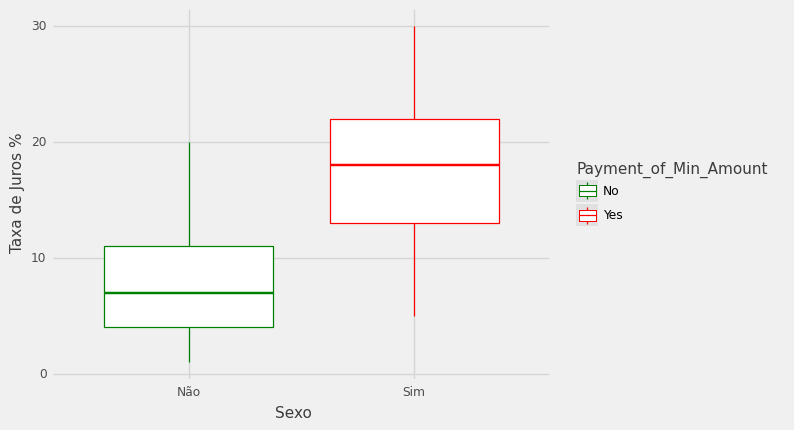

<ggplot: (8749612006938)>

In [495]:
(ggplot(dados, aes(x = "Payment_of_Min_Amount",
                  y = "Interest_Rate",
                  color = "Payment_of_Min_Amount")) + 
 theme_538() +
 geom_boxplot() +
 scale_x_discrete(labels = ["Não", "Sim"]) + 
 xlab("Sexo") +
 ylab("Taxa de Juros %") +
 scale_color_manual(values = ["green", "red"]) 
)

É possível notar que clientes que pagaram o valor mínimo da fatura ("Sim"), sofrem com maiores taxas de juros, 50% deles pagam taxas de juros de cerca de 13 à 22%, podendo chegar até 30%. Enquanto os clientes que pagaram o valor integral da fatura, tem taxas de juros de, no máximo, 20%, com a mediana em torno de 7%.

In [496]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10165 entries, 45707 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Customer_ID             10165 non-null  int64         
 1   Month                   10165 non-null  datetime64[ns]
 2   Age                     10165 non-null  int64         
 3   Monthly_Inhand_Salary   10165 non-null  category      
 4   Num_Bank_Accounts       10165 non-null  int64         
 5   Num_Credit_Card         10165 non-null  int64         
 6   Interest_Rate           10165 non-null  int64         
 7   Num_of_Loan             10165 non-null  int64         
 8   Type_of_Loan            10165 non-null  object        
 9   Delay_from_due_date     10165 non-null  int64         
 10  Num_of_Delayed_Payment  10165 non-null  int64         
 11  Outstanding_Debt        10165 non-null  category      
 12  Payment_of_Min_Amount   10165 non-null  ob